In [5]:
import torch 
torch.manual_seed(1)

import sys
sys.path.append('..')

from models import MixedModelDensityEstimator
from models import MixedModelSampler
from models import TMCSamplerLayer
from models import TMCDensityEstimatorLayer
from models import RealNVPSamplerLayer
from models import RealNVPDensityEstimatorLayer
from targets import Target
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'

ModuleNotFoundError: No module named 'models.Abstract_Models'

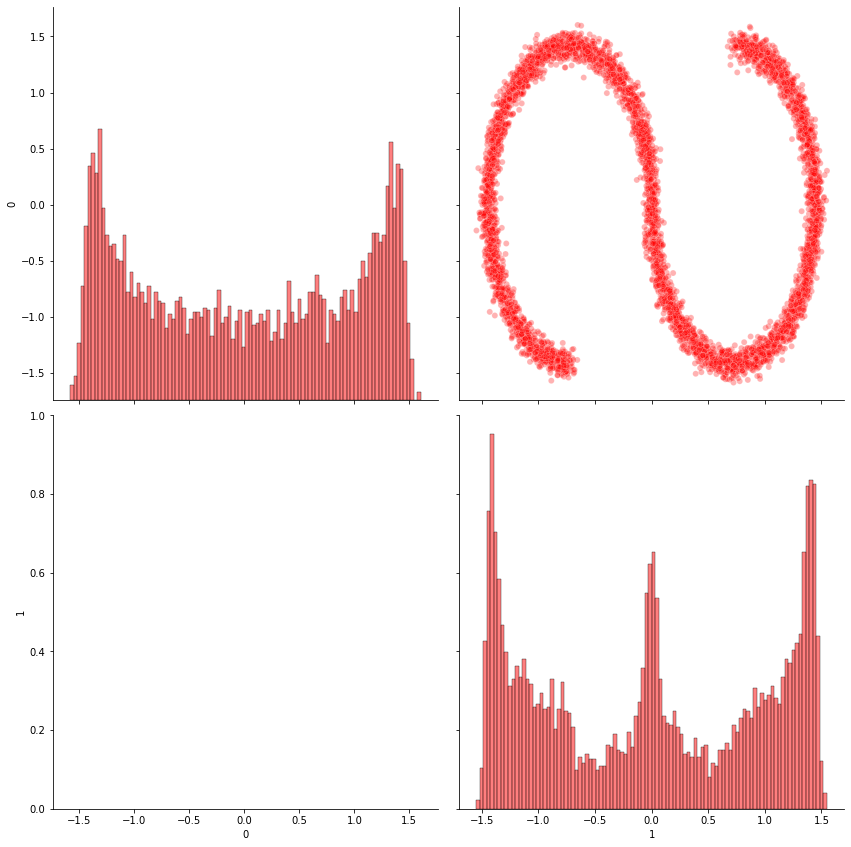

In [2]:
example =  "S Curve"
num_samples = 50000
target =Target(example, num_samples)
target.target_visual()
p, target_log_density, target_samples = target.get_target()

In [3]:
num_samples = target_samples.shape[0]
epochs =1000
batch_size = int(num_samples/75)
structure = [[RealNVPDensityEstimatorLayer,[512,512,512]],[RealNVPDensityEstimatorLayer,[512,512,512]],[RealNVPDensityEstimatorLayer,[512,512,512]],[RealNVPDensityEstimatorLayer,[512,512,512]],[RealNVPDensityEstimatorLayer,[512,512,512]]]
realnvp = MixedModelDensityEstimator(target_samples, p,structure)
realnvp.train(epochs, batch_size, visual = True)
realnvp.model_visual(num_samples=int(num_samples/5), flow = True)

 40%|███████████████████████████████████████████████████████▋                                                                                   | 401/1000 [20:24:35<30:29:15, 183.23s/it]


KeyboardInterrupt: 

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [22:41<00:00,  6.81s/it]


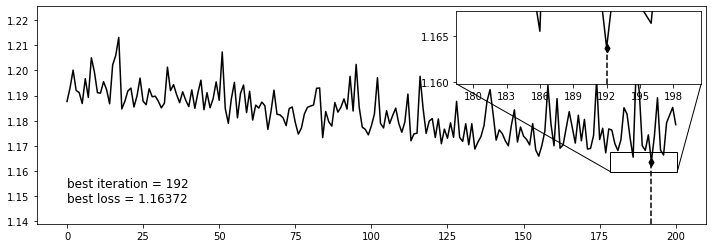

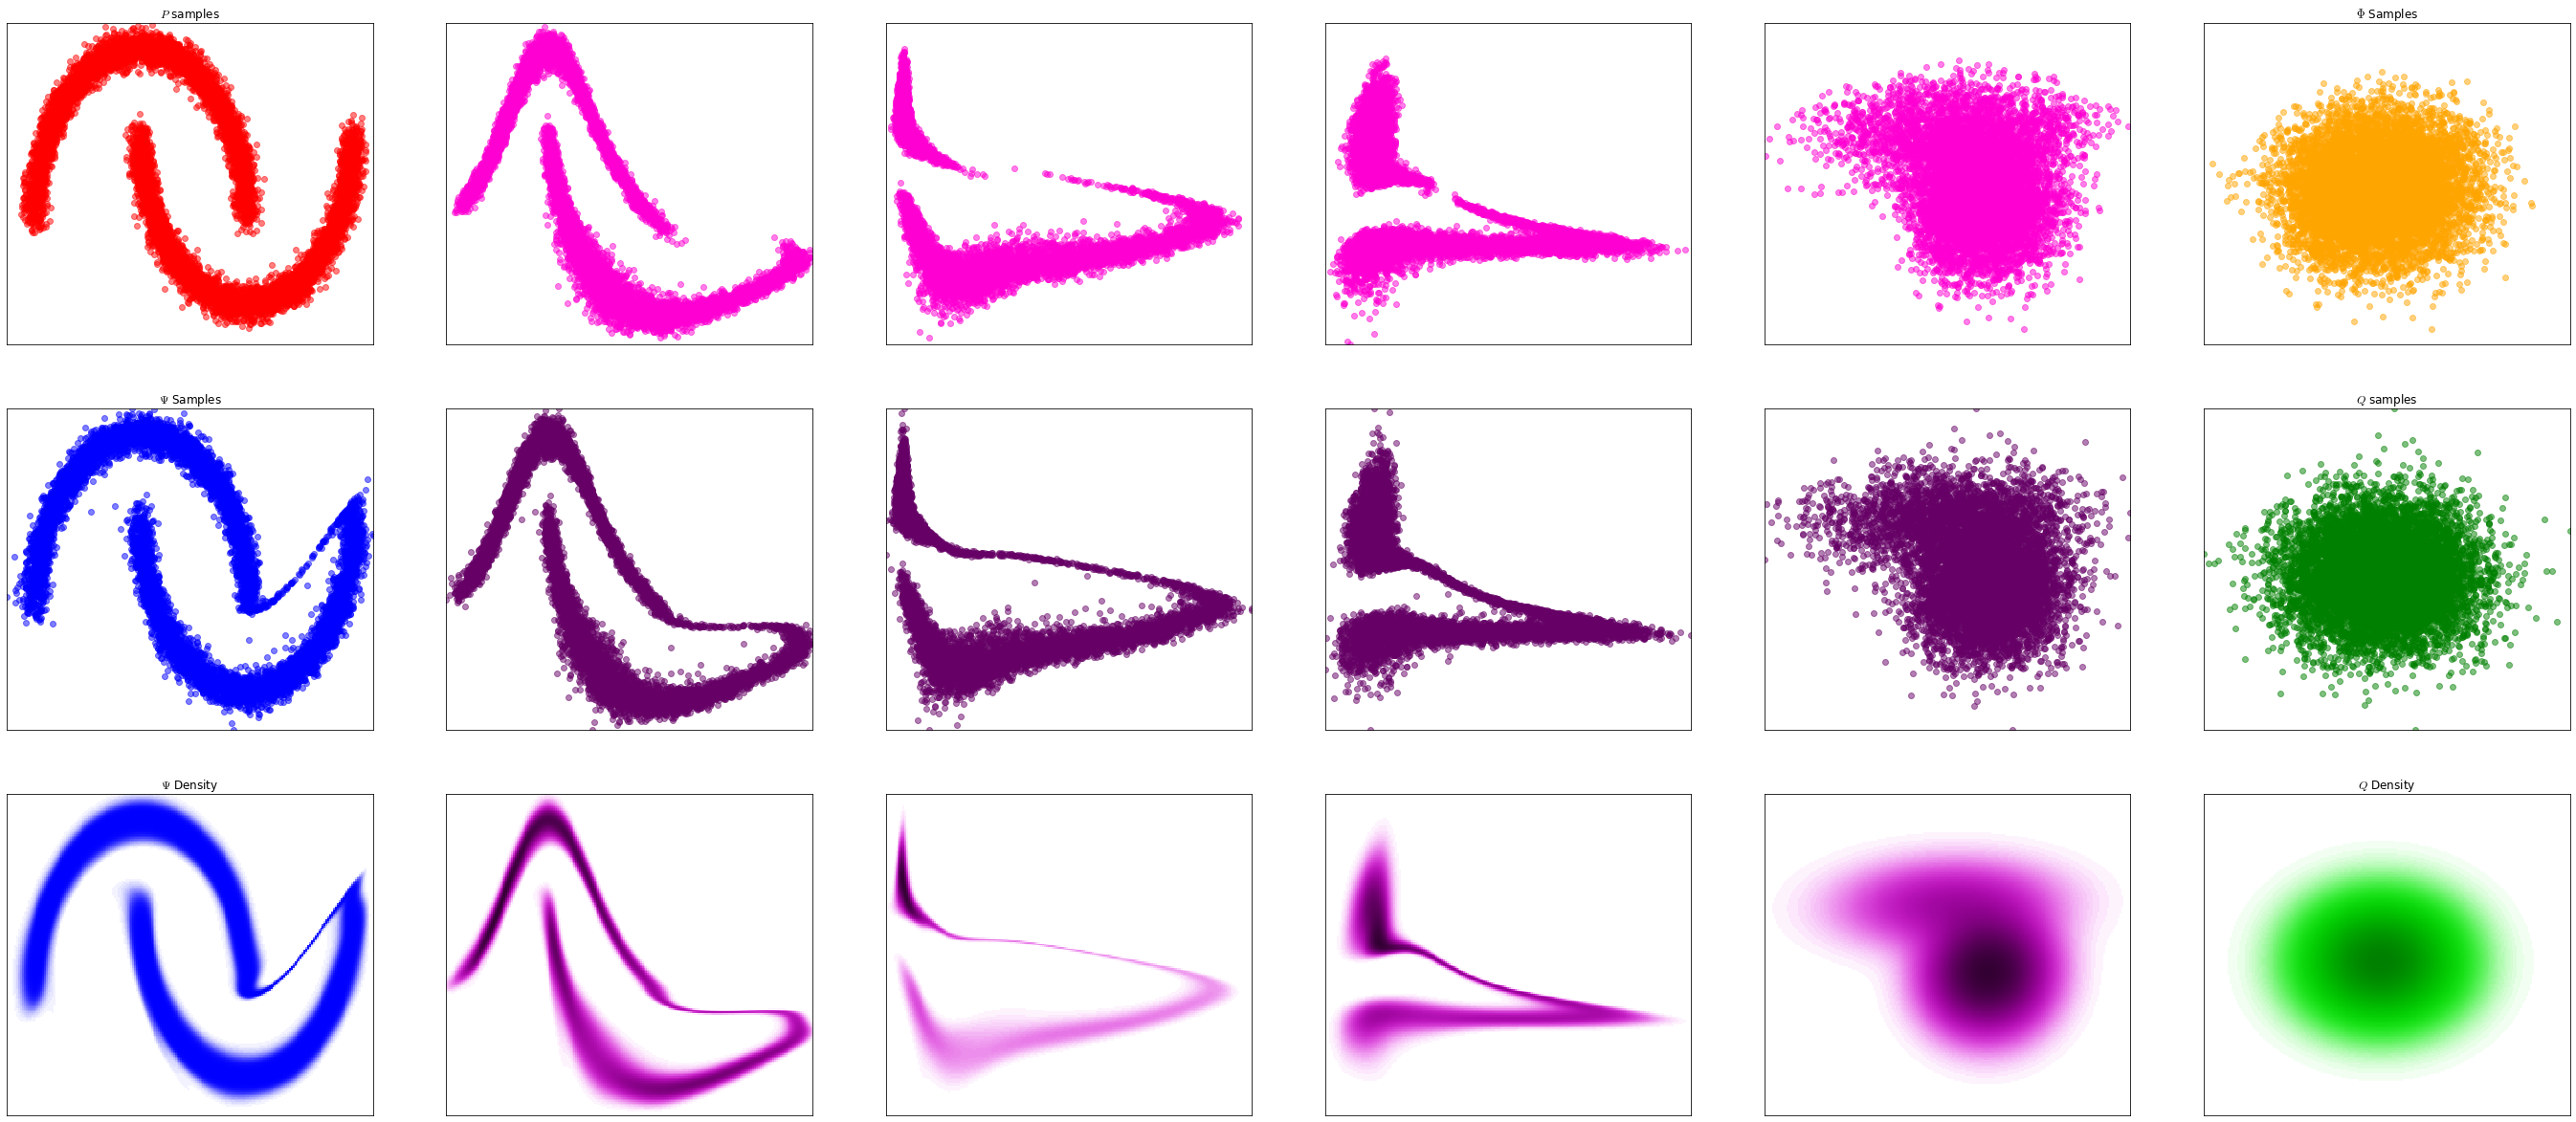

In [6]:
realnvp.train(epochs, batch_size, visual = True)
realnvp.model_visual(num_samples=int(num_samples/5), flow = True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [36:54<00:00, 11.07s/it]


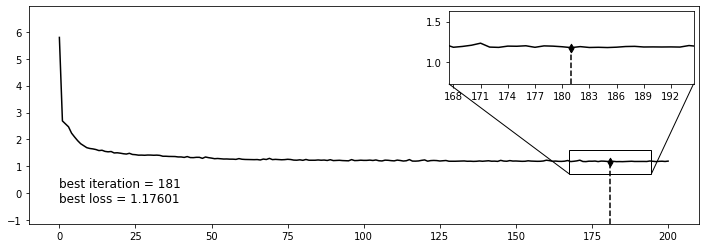

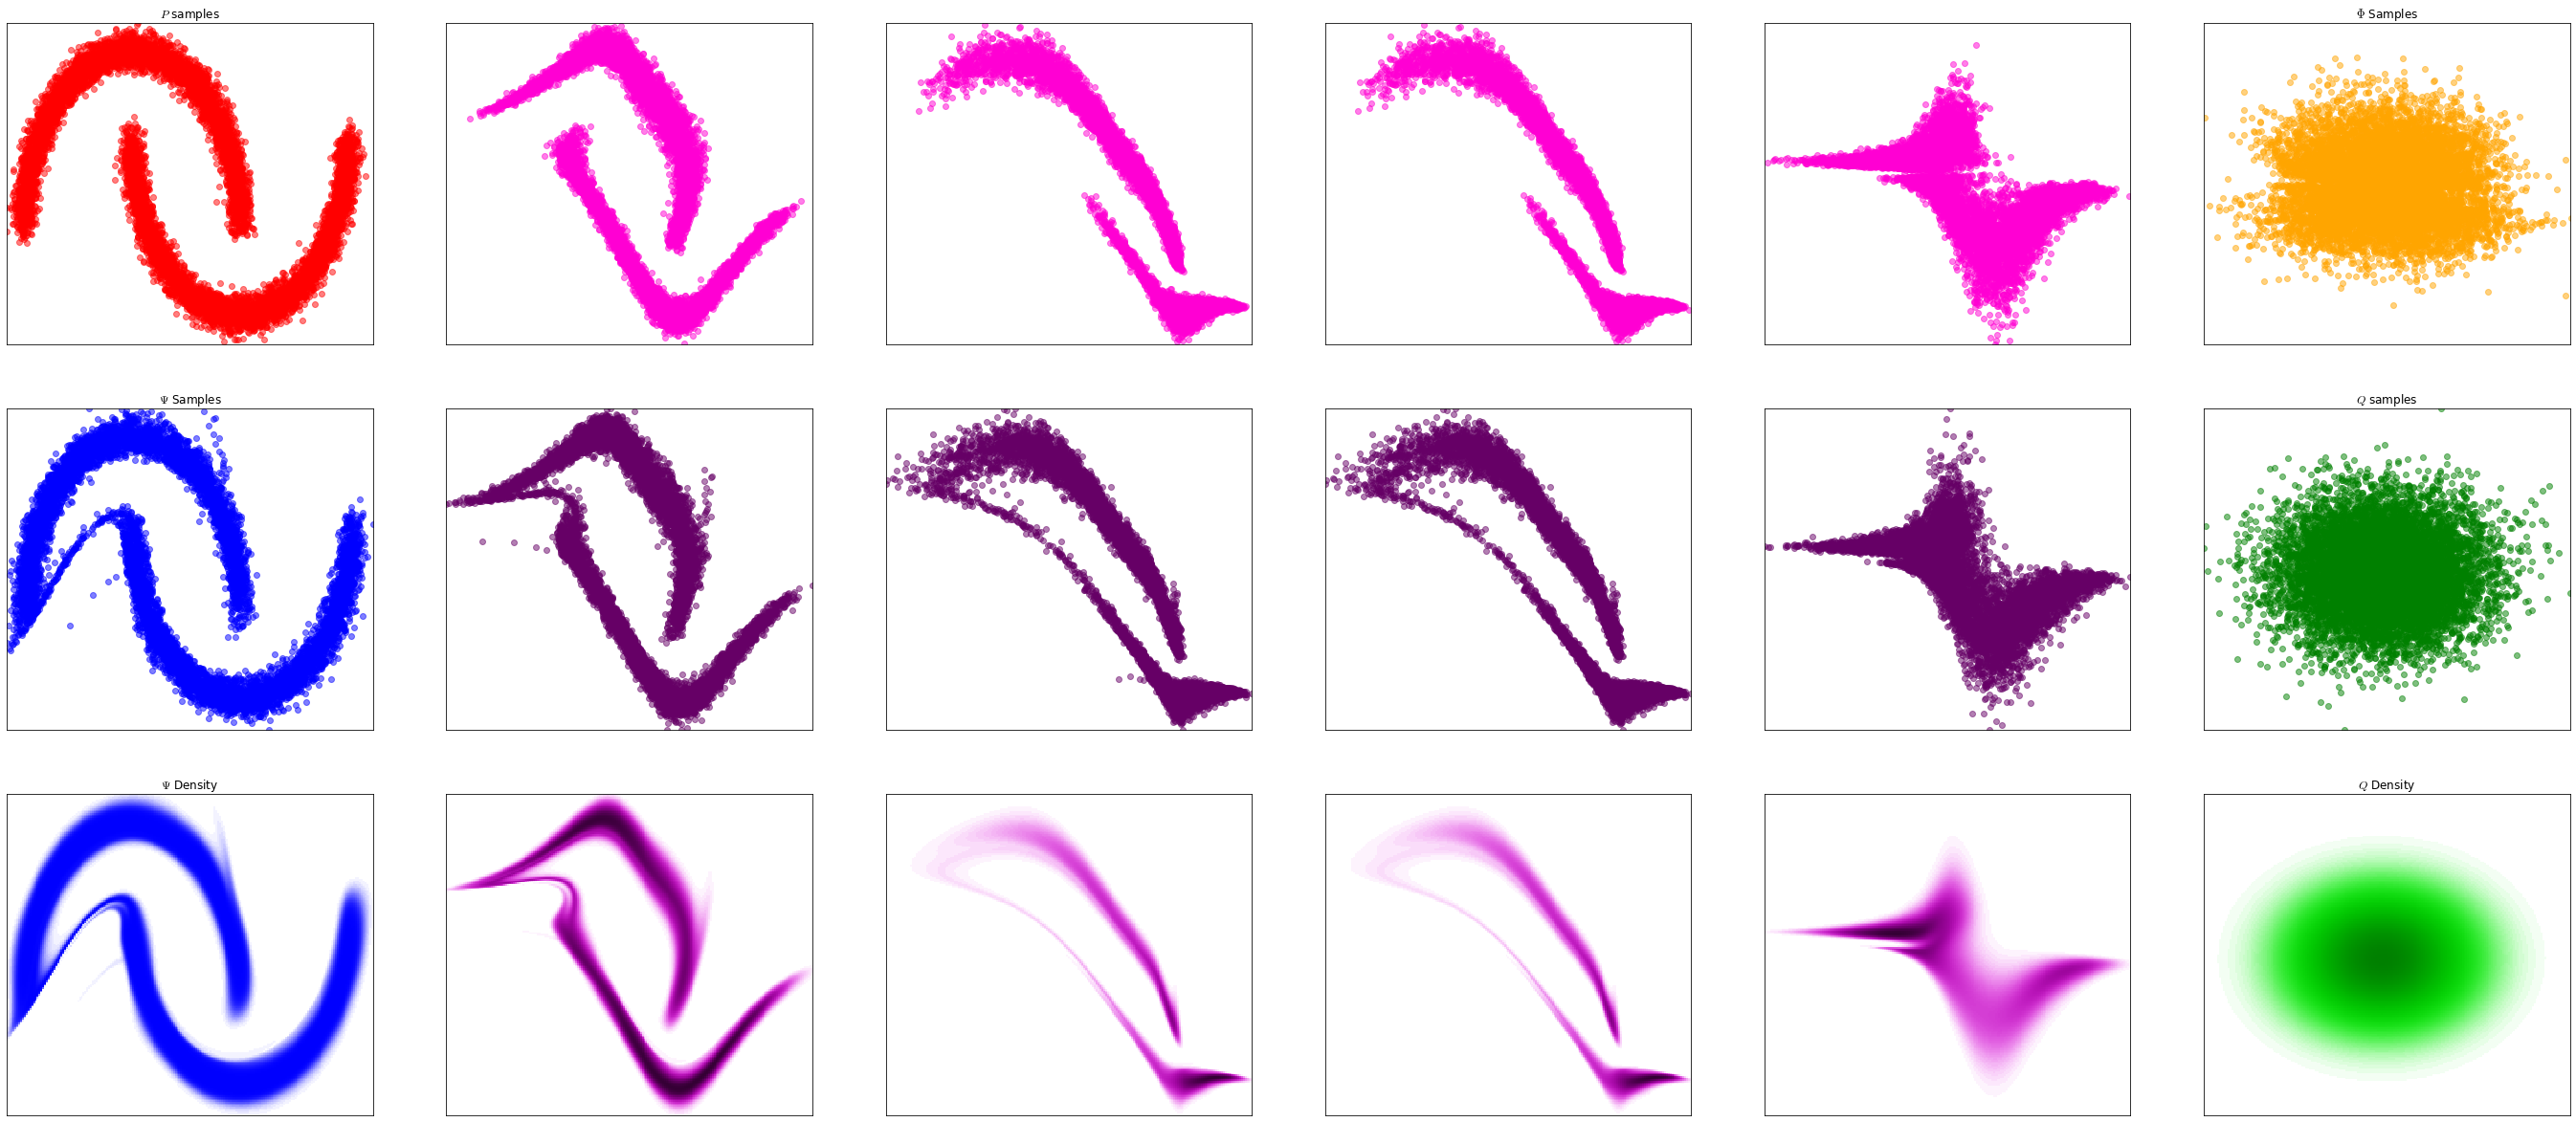

In [11]:
num_samples = target_samples.shape[0]
epochs =200
batch_size = int(num_samples/50)
structure = [[RealNVPDensityEstimatorLayer,[256,256,256]],[RealNVPDensityEstimatorLayer,[256,256,256]],[TMCDensityEstimatorLayer,2],[RealNVPDensityEstimatorLayer,[256,256,256]],[RealNVPDensityEstimatorLayer,[256,256,256]]]
realnvp = MixedModelDensityEstimator(target_samples, p,structure, initial_reference = GeneralizedMultivariateNormal(p, fixed_log_r = torch.log(2*torch.ones(p))))
realnvp.train(epochs, batch_size, visual = True)
realnvp.model_visual(num_samples=int(num_samples/5), flow = True)

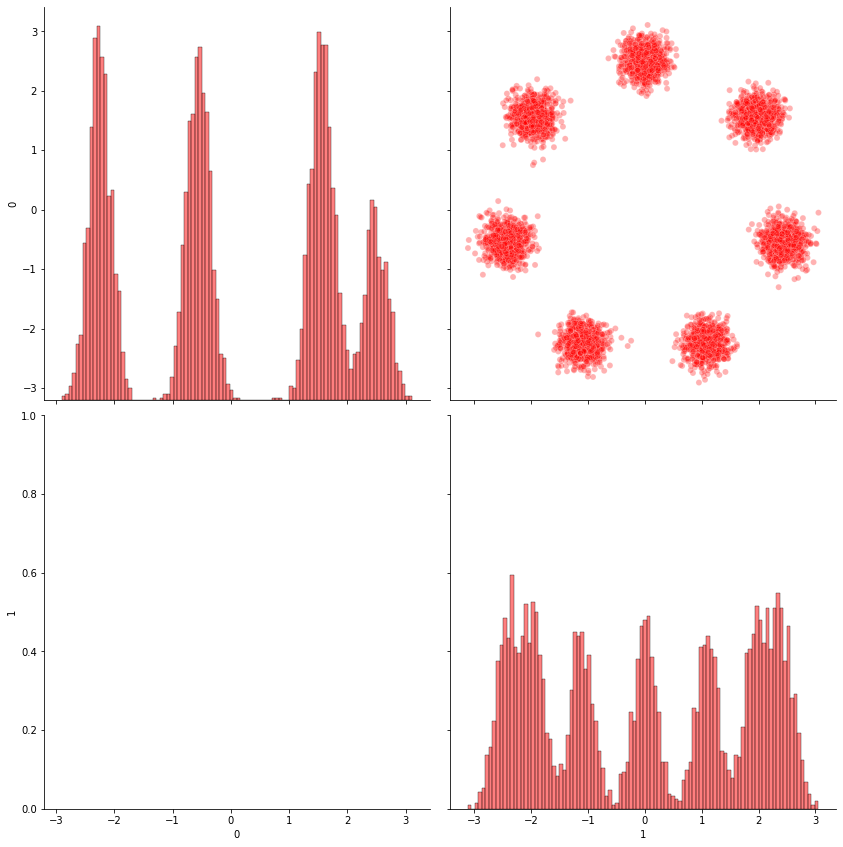

In [2]:
example =  "Orbits"
num_samples = 50000
target =Target(example, num_samples)
target.target_visual()
p, target_log_density, target_samples = target.get_target()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [01:06<00:00,  3.01it/s]
c:\users\ea264728\pycharmprojects\tmc\venv\lib\site-packages\torch\functional.py:1069: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.cartesian_prod(tensors)  # type: ignore[attr-defined]


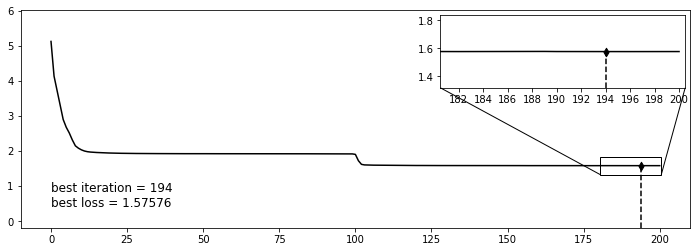

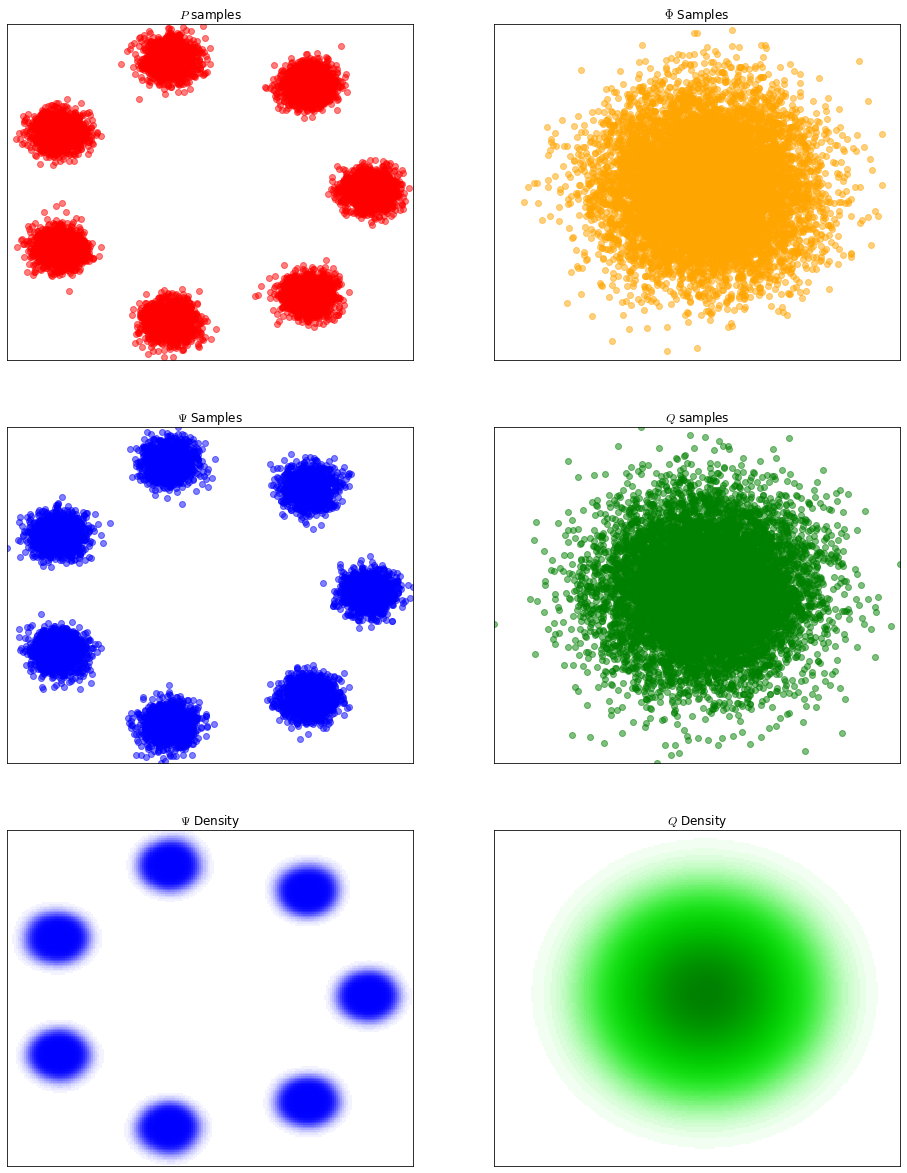

In [3]:
num_samples = target_samples.shape[0]
epochs =200
batch_size = int(num_samples/50)
structure = [[TMCDensityEstimatorLayer,7]]
realnvp = MixedModelDensityEstimator(target_samples, p,structure, initial_reference = GeneralizedMultivariateNormal(p, fixed_log_r = torch.log(2*torch.ones(p))))
realnvp.train(epochs, batch_size, visual = True)
realnvp.model_visual(num_samples=int(num_samples/5), flow = True)

In [7]:
target_log_density = realnvp.model_log_density
num_samples = target_samples.shape[0]
epochs =200
batch_size = int(num_samples/50)
structure = [[RealNVPSamplerLayer,[512,512,512,512]],[RealNVPSamplerLayer,[512,512,512,512]],[RealNVPSamplerLayer,[512,512,512,512]],[RealNVPSamplerLayer,[512,512,512,512]],[RealNVPSamplerLayer,[512,512,512,512]]]
realnvp2 = MixedModelSampler(target_log_density, p,structure)
realnvp2.train(num_samples,epochs, batch_size)
realnvp2.model_visual(num_samples=5000, flow = True)

 46%|███████████████████████████████████████████████████████████████████▎                                                                                | 91/200 [48:12<57:45, 31.79s/it]


KeyboardInterrupt: 